# Advanced Machine Learning

## Assignment #4

### Packages

In [1]:
import os
print(os.listdir('flowers-recognition/flowers/flowers'))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [2]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
from tqdm import tqdm
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import random as rn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Model

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

from IPython.display import clear_output

Using TensorFlow backend.


In [3]:
X=[]
Z=[]
IMG_SIZE=224
FLOWER_DAISY_DIR='flowers-recognition/flowers/flowers/daisy'
FLOWER_SUNFLOWER_DIR='flowers-recognition/flowers/flowers/sunflower'
FLOWER_TULIP_DIR='flowers-recognition/flowers/flowers/tulip'
FLOWER_DANDI_DIR='flowers-recognition/flowers/flowers/dandelion'
FLOWER_ROSE_DIR='flowers-recognition/flowers/flowers/rose'

In [4]:
def assign_label(img, flower_type):
    return flower_type

In [5]:
def make_train_data(flower_type, DIR):
    print("Importing {flower}...".format(flower = flower_type))
    
    for img in os.listdir(DIR):
        try:
            label = assign_label(img, flower_type)
            path = os.path.join(DIR, img)
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass
        
    print("### Done ###")

In [6]:
make_train_data('Daisy', FLOWER_DAISY_DIR)
make_train_data('Sunflower', FLOWER_SUNFLOWER_DIR)
make_train_data('Tulip', FLOWER_TULIP_DIR)
make_train_data('Dandelion', FLOWER_DANDI_DIR)
make_train_data('Rose', FLOWER_ROSE_DIR)

Importing Daisy...
### Done ###
Importing Sunflower...
### Done ###
Importing Tulip...
### Done ###
Importing Dandelion...
### Done ###
Importing Rose...
### Done ###


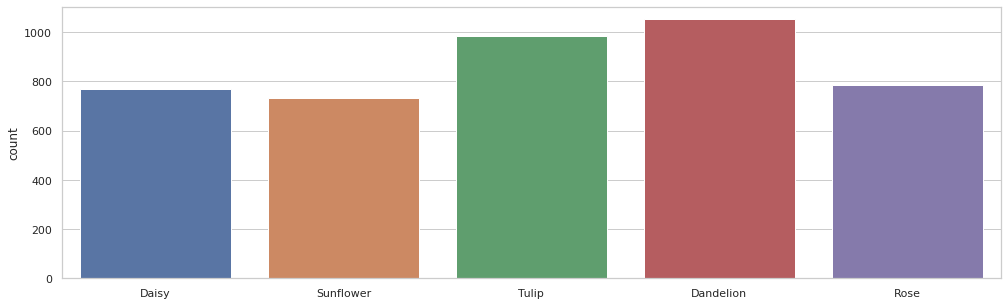

In [7]:
plt.figure(figsize = (15, 5))
sns.countplot(Z)

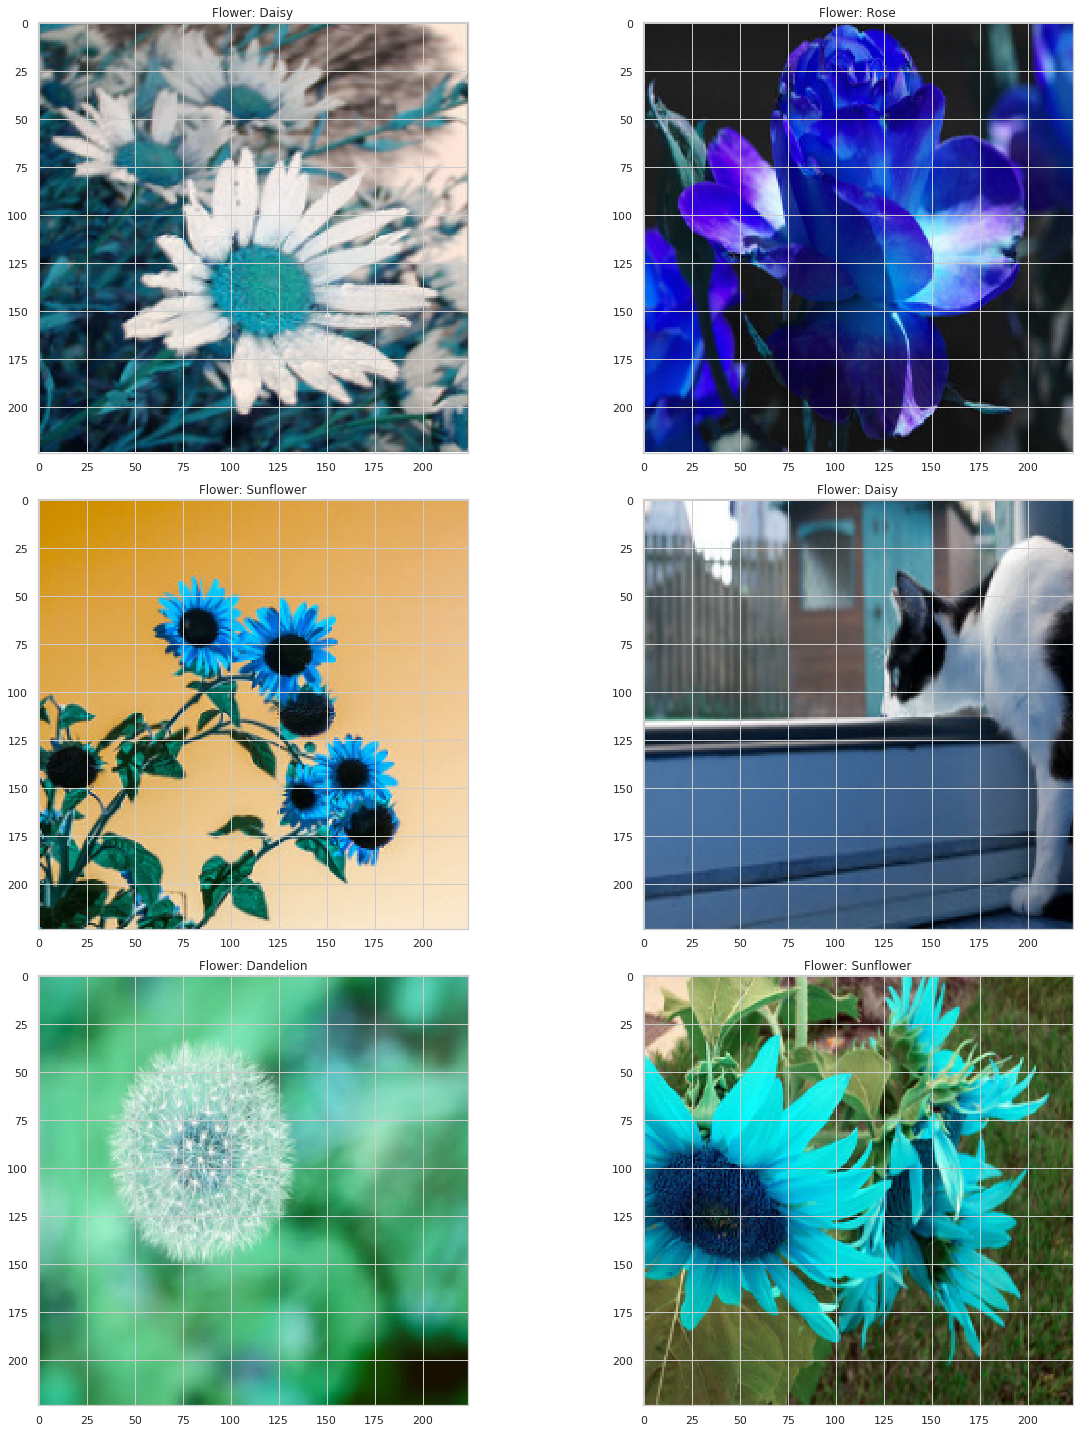

In [8]:
fig, ax = plt.subplots(3, 2, figsize = (30, 30))
fig.set_size_inches(20, 20)
for i in range(3):
    for j in range (2):
        l = rn.randint(0,len(Z))
        ax[i, j].imshow(X[l])
        ax[i, j].set_title('Flower: '+ Z[l])
        
plt.tight_layout()

In [9]:
#le = LabelEncoder()
#Y = le.fit_transform(Z)
#Y = to_categorical(Y, num_classes = 5)
X = np.array(X)
#X = X.astype('float32')/255

In [10]:
#X.shape, Y.shape

NameError: name 'Y' is not defined

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.25,
                                                    random_state = 42,
                                                    stratify = Y)

https://www.kaggle.com/rajmehra03/flower-recognition-cnn-keras


In [19]:
base_model = VGG16(include_top = False,
                   weights = 'imagenet',
                   input_shape = (224,224,3),
                   pooling='avg')

In [20]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
img_data = preprocess_input(X)
img_data.shape

(4323, 224, 224, 3)

In [16]:
model2 = Model(base_model.input, base_model.layers[-14].output)

In [17]:
model2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [18]:
#im_data = img_data[0:2]
#im_data = im_data.reshape((-1,224,224,3))
#img_data.shape

vgg16_feature = model2.predict(img_data)
vgg16_feature = vgg16_feature.reshape((vgg16_feature.shape[0], 56*56*128))
vgg16_feature.shape

KeyboardInterrupt: 